In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/titanic.csv")

In [3]:
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
df = df.drop(columns = ["PassengerId", "Name", "SibSp", "Parch", "Ticket","Cabin", "Embarked"])

In [6]:
df.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [8]:
df["age_bin"] = pd.cut(df['Age'],bins =[0,10,20,30,40,50,60,70,80])

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

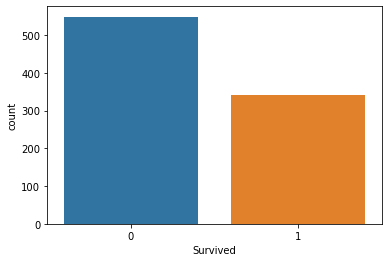

In [11]:
sns.countplot(x='Survived', data =df)

In [12]:
alive_df= df.loc[df.Survived == 1]
dead_df = df.loc[df.Survived == 0]

In [13]:
alive_df

,Pclass,Gender,Age,Fare,Survived,age_bin
1,1,female,38.0,71.2833,1,"(30, 40]"
2,3,female,26.0,7.9250,1,"(20, 30]"
3,1,female,35.0,53.1000,1,"(30, 40]"
8,3,female,27.0,11.1333,1,"(20, 30]"
9,2,female,14.0,30.0708,1,"(10, 20]"
...,...,...,...,...,...,...
875,3,female,15.0,7.2250,1,"(10, 20]"
879,1,female,56.0,83.1583,1,"(50, 60]"
880,2,female,25.0,26.0000,1,"(20, 30]"
887,1,female,19.0,30.0000,1,"(10, 20]"


In [14]:
alive_df.groupby('Pclass').count()

,Gender,Age,Fare,Survived,age_bin
Pclass,,,,,
1,136,122,136,136,122
2,87,83,87,87,83
3,119,85,119,119,85


In [15]:
alive_df_gender =alive_df.groupby('Pclass')
dead_df_gender= dead_df.groupby('Pclass')

In [16]:
class1=alive_df_gender.get_group(1)
class2= alive_df_gender.get_group(2)
class3= alive_df_gender.get_group(3)


In [17]:
class1

,Pclass,Gender,Age,Fare,Survived,age_bin
1,1,female,38.0,71.2833,1,"(30.0, 40.0]"
3,1,female,35.0,53.1000,1,"(30.0, 40.0]"
11,1,female,58.0,26.5500,1,"(50.0, 60.0]"
23,1,male,28.0,35.5000,1,"(20.0, 30.0]"
31,1,female,NaN,146.5208,1,NaN
...,...,...,...,...,...,...
862,1,female,48.0,25.9292,1,"(40.0, 50.0]"
871,1,female,47.0,52.5542,1,"(40.0, 50.0]"
879,1,female,56.0,83.1583,1,"(50.0, 60.0]"
887,1,female,19.0,30.0000,1,"(10.0, 20.0]"


In [18]:
class11 = class1.groupby('Gender').count()['Pclass']
class22 = class2.groupby('Gender').count()['Pclass']
class33 = class3.groupby('Gender').count()['Pclass']

In [19]:
class11, class22, class33

(Gender
 female    91
 male      45
 Name: Pclass, dtype: int64,
 Gender
 female    70
 male      17
 Name: Pclass, dtype: int64,
 Gender
 female    72
 male      47
 Name: Pclass, dtype: int64)

In [20]:
male_class, female_class

NameError: name 'male_class' is not defined

In [21]:
barWidth = 0.25

In [22]:
br1 = np.arange(2)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

In [23]:
alive_df_gender


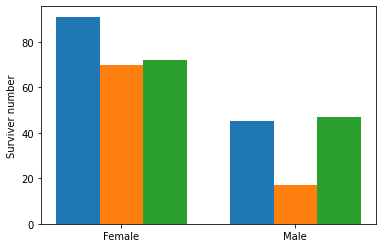

In [24]:
plt.bar(br1,class11,width = barWidth)
plt.bar(br2,class22,width = barWidth)
plt.bar(br3,class33,width = barWidth)
plt.xticks([r + barWidth for r in range(2)],["Female","Male"])
plt.ylabel("Surviver number")

plt.show()

In [25]:
alive_df.groupby("Gender").count()['Survived'] / alive_df["Gender"].count() *100

Gender
female    68.128655
male      31.871345
Name: Survived, dtype: float64

In [26]:
alive_df.groupby("Pclass").count()['Survived'] / alive_df["Gender"].count() *100

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

In [27]:
alive_df["age_bin"] = pd.cut(alive_df['Age'],bins =[0,10,20,30,40,50,60,70,80])

C:\Users\Dell\AppData\Local\Temp\ipykernel_11288\2568930723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_df["age_bin"] = pd.cut(alive_df['Age'],bins =[0,10,20,30,40,50,60,70,80])


In [28]:
df

,Pclass,Gender,Age,Fare,Survived,age_bin
0,3,male,22.0,7.2500,0,"(20.0, 30.0]"
1,1,female,38.0,71.2833,1,"(30.0, 40.0]"
2,3,female,26.0,7.9250,1,"(20.0, 30.0]"
3,1,female,35.0,53.1000,1,"(30.0, 40.0]"
4,3,male,35.0,8.0500,0,"(30.0, 40.0]"
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,"(20.0, 30.0]"
887,1,female,19.0,30.0000,1,"(10.0, 20.0]"
888,3,female,NaN,23.4500,0,NaN
889,1,male,26.0,30.0000,1,"(20.0, 30.0]"


In [29]:
agebin_df=alive_df.groupby("age_bin").count()['Survived'] / alive_df["Gender"].count() *100

In [30]:
agebin_df

age_bin
(0, 10]     11.111111
(10, 20]    12.865497
(20, 30]    24.561404
(30, 40]    20.175439
(40, 50]     9.649123
(50, 60]     4.970760
(60, 70]     1.169591
(70, 80]     0.292398
Name: Survived, dtype: float64

In [31]:
br1 = np.arange(len())
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

TypeError: len() takes exactly one argument (0 given)

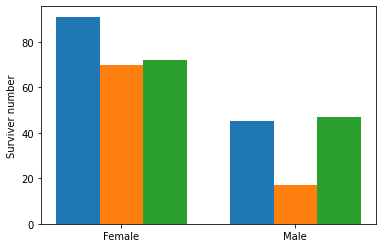

In [32]:
plt.bar(br1,class11,width = barWidth)
plt.bar(br2,class22,width = barWidth)
plt.bar(br3,class33,width = barWidth)
plt.xticks([r + barWidth for r in range(2)],["Female","Male"])
plt.ylabel("Surviver number")

plt.show()

In [33]:
class11 = class1.groupby('Gender').count()['Pclass']
class22 = class2.groupby('Gender').count()['Pclass']
class33 = class3.groupby('Gender').count()['Pclass']

In [34]:
class_group=df.groupby('Pclass')

In [35]:
class1

,Pclass,Gender,Age,Fare,Survived,age_bin
1,1,female,38.0,71.2833,1,"(30.0, 40.0]"
3,1,female,35.0,53.1000,1,"(30.0, 40.0]"
11,1,female,58.0,26.5500,1,"(50.0, 60.0]"
23,1,male,28.0,35.5000,1,"(20.0, 30.0]"
31,1,female,NaN,146.5208,1,NaN
...,...,...,...,...,...,...
862,1,female,48.0,25.9292,1,"(40.0, 50.0]"
871,1,female,47.0,52.5542,1,"(40.0, 50.0]"
879,1,female,56.0,83.1583,1,"(50.0, 60.0]"
887,1,female,19.0,30.0000,1,"(10.0, 20.0]"


In [36]:
class1_gender=class1.groupby('Gender')
class2_gender=class2.groupby('Gender')
class3_gender=class3.groupby('Gender')

In [37]:
class1_gender_male=class1_gender.get_group("male")
class2_gender_male=class2_gender.get_group("male")
class3_gender_male=class3_gender.get_group("male")


In [38]:
class1_gender_female=class1_gender.get_group("female")
class2_gender_female=class2_gender.get_group("female")
class3_gender_female=class3_gender.get_group("female")


In [39]:
class2_gender_female

,Pclass,Gender,Age,Fare,Survived,age_bin
9,2,female,14.0,30.0708,1,"(10, 20]"
15,2,female,55.0,16.0000,1,"(50, 60]"
43,2,female,3.0,41.5792,1,"(0, 10]"
53,2,female,29.0,26.0000,1,"(20, 30]"
56,2,female,21.0,10.5000,1,"(20, 30]"
...,...,...,...,...,...,...
801,2,female,31.0,26.2500,1,"(30, 40]"
865,2,female,42.0,13.0000,1,"(40, 50]"
866,2,female,27.0,13.8583,1,"(20, 30]"
874,2,female,28.0,24.0000,1,"(20, 30]"


In [40]:
class1_gender_male.groupby('age_bin').count()['Pclass',]

KeyError: ('Pclass',)

In [41]:
class1_gender_female.groupby('age_bin').count()

,Pclass,Gender,Age,Fare,Survived
age_bin,,,,,
"(0, 10]",0,0,0,0,0
"(10, 20]",13,13,13,13,13
"(20, 30]",20,20,20,20,20
"(30, 40]",24,24,24,24,24
"(40, 50]",12,12,12,12,12
"(50, 60]",11,11,11,11,11
"(60, 70]",2,2,2,2,2
"(70, 80]",0,0,0,0,0


In [42]:
rate = df.groupby(['Pclass','age_bin','Gender'])['Survived'].count().reset_index()
rate.count()

Pclass      48
age_bin     48
Gender      48
Survived    48
dtype: int64

In [43]:
table = pd.pivot_table(rate, values = "Survived", index=['age_bin','Gender'],columns = ['Pclass'], fill_value=0)

In [44]:
table

Pclass            1   2   3
age_bin  Gender            
(0, 10]  female   1   8  22
         male     2   9  22
(10, 20] female  13   8  25
         male     5  10  54
(20, 30] female  21  28  32
         male    19  33  97
(30, 40] female  24  17  14
         male    25  26  49
(40, 50] female  13  10   8
         male    24   9  22
(50, 60] female  11   3   0
         male    14   9   5
(60, 70] female   2   0   1
         male     9   3   2
(70, 80] female   0   0   0
         male     3   0   2

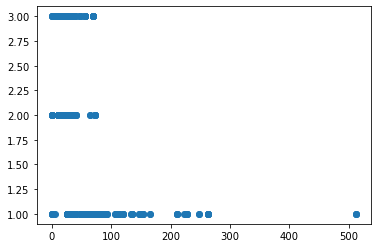

In [45]:
plt.scatter(df['Fare'],df['Pclass'])

In [46]:

Pclass_df = df['Pclass']

In [47]:
new_df = df.drop(columns=['Pclass'])

In [48]:
new_df 

,Gender,Age,Fare,Survived,age_bin
0,male,22.0,7.2500,0,"(20.0, 30.0]"
1,female,38.0,71.2833,1,"(30.0, 40.0]"
2,female,26.0,7.9250,1,"(20.0, 30.0]"
3,female,35.0,53.1000,1,"(30.0, 40.0]"
4,male,35.0,8.0500,0,"(30.0, 40.0]"
...,...,...,...,...,...
886,male,27.0,13.0000,0,"(20.0, 30.0]"
887,female,19.0,30.0000,1,"(10.0, 20.0]"
888,female,NaN,23.4500,0,NaN
889,male,26.0,30.0000,1,"(20.0, 30.0]"


In [49]:
new_df22 = pd.get_dummies(new_df,columns=["Gender","age_bin"])

In [50]:
new_df22

,Age,Fare,Survived,Gender_female,Gender_male,"age_bin_(0, 10]","age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 80]"
0,22.0,7.2500,0,0,1,0,0,1,0,0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,1,0,0,0,0
2,26.0,7.9250,1,1,0,0,0,1,0,0,0,0,0
3,35.0,53.1000,1,1,0,0,0,0,1,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,1,0,0,1,0,0,0,0,0
887,19.0,30.0000,1,1,0,0,1,0,0,0,0,0,0
888,NaN,23.4500,0,1,0,0,0,0,0,0,0,0,0
889,26.0,30.0000,1,0,1,0,0,1,0,0,0,0,0


In [51]:
new_df22.describe()

,Age,Fare,Survived,Gender_female,Gender_male,"age_bin_(0, 10]","age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 80]"
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838,0.352413,0.647587,0.071829,0.129068,0.258137,0.173962,0.096521,0.047138,0.019080,0.005612
std,14.526497,49.693429,0.486592,0.477990,0.477990,0.258350,0.335464,0.437855,0.379290,0.295470,0.212053,0.136882,0.074743
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
new_df22.isnull().sum()

Age                 177
Fare                  0
Survived              0
Gender_female         0
Gender_male           0
age_bin_(0, 10]       0
age_bin_(10, 20]      0
age_bin_(20, 30]      0
age_bin_(30, 40]      0
age_bin_(40, 50]      0
age_bin_(50, 60]      0
age_bin_(60, 70]      0
age_bin_(70, 80]      0
dtype: int64

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer


In [54]:
X=new_df22['Age'].values
X = new_df22.iloc[:,0].values
X

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [55]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.NaN, strategy= 'mean')

imputer.fit(X)




ValueError: Expected 2D array, got 1D array instead:
array=[22.   38.   26.   35.   35.     nan 54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.     nan 31.     nan 35.   34.   15.   28.
  8.   38.     nan 19.     nan   nan 40.     nan   nan 66.   28.   42.
   nan 21.   18.   14.   40.   27.     nan  3.   19.     nan   nan   nan
   nan 18.    7.   21.   49.   29.   65.     nan 21.   28.5   5.   11.
 22.   38.   45.    4.     nan   nan 29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.     nan   nan  0.83 30.   22.   29.     nan 28.
 17.   33.   16.     nan 23.   24.   29.   20.   46.   26.   59.     nan
 71.   23.   34.   34.   28.     nan 21.   33.   37.   28.   21.     nan
 38.     nan 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.     nan 32.5  32.5  54.   12.     nan 24.     nan 45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.     nan 22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5    nan 51.
 16.   30.     nan   nan 44.   40.   26.   17.    1.    9.     nan 45.
   nan 28.   61.    4.    1.   21.   56.   18.     nan 50.   30.   36.
   nan   nan  9.    1.    4.     nan   nan 45.   40.   36.   32.   19.
 19.    3.   44.   58.     nan 42.     nan 24.   28.     nan 34.   45.5
 18.    2.   32.   26.   16.   40.   24.   35.   22.   30.     nan 31.
 27.   42.   32.   30.   16.   27.   51.     nan 38.   22.   19.   20.5
 18.     nan 35.   29.   59.    5.   24.     nan 44.    8.   19.   33.
   nan   nan 29.   22.   30.   44.   25.   24.   37.   54.     nan 29.
 62.   30.   41.   29.     nan 30.   35.   50.     nan  3.   52.   40.
   nan 36.   16.   25.   58.   35.     nan 25.   41.   37.     nan 63.
 45.     nan  7.   35.   65.   28.   16.   19.     nan 33.   30.   22.
 42.   22.   26.   19.   36.   24.   24.     nan 23.5   2.     nan 50.
   nan   nan 19.     nan   nan  0.92   nan 17.   30.   30.   24.   18.
 26.   28.   43.   26.   24.   54.   31.   40.   22.   27.   30.   22.
   nan 36.   61.   36.   31.   16.     nan 45.5  38.   16.     nan   nan
 29.   41.   45.   45.    2.   24.   28.   25.   36.   24.   40.     nan
  3.   42.   23.     nan 15.   25.     nan 28.   22.   38.     nan   nan
 40.   29.   45.   35.     nan 30.   60.     nan   nan 24.   25.   18.
 19.   22.    3.     nan 22.   27.   20.   19.   42.    1.   32.   35.
   nan 18.    1.   36.     nan 17.   36.   21.   28.   23.   24.   22.
 31.   46.   23.   28.   39.   26.   21.   28.   20.   34.   51.    3.
 21.     nan   nan   nan 33.     nan 44.     nan 34.   18.   30.   10.
   nan 21.   29.   28.   18.     nan 28.   19.     nan 32.   28.     nan
 42.   17.   50.   14.   21.   24.   64.   31.   45.   20.   25.   28.
   nan  4.   13.   34.    5.   52.   36.     nan 30.   49.     nan 29.
 65.     nan 50.     nan 48.   34.   47.   48.     nan 38.     nan 56.
   nan  0.75   nan 38.   33.   23.   22.     nan 34.   29.   22.    2.
  9.     nan 50.   63.   25.     nan 35.   58.   30.    9.     nan 21.
 55.   71.   21.     nan 54.     nan 25.   24.   17.   21.     nan 37.
 16.   18.   33.     nan 28.   26.   29.     nan 36.   54.   24.   47.
 34.     nan 36.   32.   30.   22.     nan 44.     nan 40.5  50.     nan
 39.   23.    2.     nan 17.     nan 30.    7.   45.   30.     nan 22.
 36.    9.   11.   32.   50.   64.   19.     nan 33.    8.   17.   27.
   nan 22.   22.   62.   48.     nan 39.   36.     nan 40.   28.     nan
   nan 24.   19.   29.     nan 32.   62.   53.   36.     nan 16.   19.
 34.   39.     nan 32.   25.   39.   54.   36.     nan 18.   47.   60.
 22.     nan 35.   52.   47.     nan 37.   36.     nan 49.     nan 49.
 24.     nan   nan 44.   35.   36.   30.   27.   22.   40.   39.     nan
   nan   nan 35.   24.   34.   26.    4.   26.   27.   42.   20.   21.
 21.   61.   57.   21.   26.     nan 80.   51.   32.     nan  9.   28.
 32.   31.   41.     nan 20.   24.    2.     nan  0.75 48.   19.   56.
   nan 23.     nan 18.   21.     nan 18.   24.     nan 32.   23.   58.
 50.   40.   47.   36.   20.   32.   25.     nan 43.     nan 40.   31.
 70.   31.     nan 18.   24.5  18.   43.   36.     nan 27.   20.   14.
 60.   25.   14.   19.   18.   15.   31.    4.     nan 25.   60.   52.
 44.     nan 49.   42.   18.   35.   18.   25.   26.   39.   45.   42.
 22.     nan 24.     nan 48.   29.   52.   19.   38.   27.     nan 33.
  6.   17.   34.   50.   27.   20.   30.     nan 25.   25.   29.   11.
   nan 23.   23.   28.5  48.   35.     nan   nan   nan 36.   21.   24.
 31.   70.   16.   30.   19.   31.    4.    6.   33.   23.   48.    0.67
 28.   18.   34.   33.     nan 41.   20.   36.   16.   51.     nan 30.5
   nan 32.   24.   48.   57.     nan 54.   18.     nan  5.     nan 43.
 13.   17.   29.     nan 25.   25.   18.    8.    1.   46.     nan 16.
   nan   nan 25.   39.   49.   31.   30.   30.   34.   31.   11.    0.42
 27.   31.   39.   18.   39.   33.   26.   39.   35.    6.   30.5    nan
 23.   31.   43.   10.   52.   27.   38.   27.    2.     nan   nan  1.
   nan 62.   15.    0.83   nan 23.   18.   39.   21.     nan 32.     nan
 20.   16.   30.   34.5  17.   42.     nan 35.   28.     nan  4.   74.
  9.   16.   44.   18.   45.   51.   24.     nan 41.   21.   48.     nan
 24.   42.   27.   31.     nan  4.   26.   47.   33.   47.   28.   15.
 20.   19.     nan 56.   25.   33.   22.   28.   25.   39.   27.   19.
   nan 26.   32.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
pd.DataFrame(numeric_nparray)

NameError: name 'numeric_nparray' is not defined

In [57]:
numeric_nparray

NameError: name 'numeric_nparray' is not defined

In [58]:
mean_age = new_df22['Age'].mean()
new_df22["Age"].fillna(mean_age,inplace= True)

In [59]:
new_df22.isnull().sum()

Age                 0
Fare                0
Survived            0
Gender_female       0
Gender_male         0
age_bin_(0, 10]     0
age_bin_(10, 20]    0
age_bin_(20, 30]    0
age_bin_(30, 40]    0
age_bin_(40, 50]    0
age_bin_(50, 60]    0
age_bin_(60, 70]    0
age_bin_(70, 80]    0
dtype: int64

In [60]:
new_df22.head(10)

,Age,Fare,Survived,Gender_female,Gender_male,"age_bin_(0, 10]","age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 80]"
0,22.000000,7.2500,0,0,1,0,0,1,0,0,0,0,0
1,38.000000,71.2833,1,1,0,0,0,0,1,0,0,0,0
2,26.000000,7.9250,1,1,0,0,0,1,0,0,0,0,0
3,35.000000,53.1000,1,1,0,0,0,0,1,0,0,0,0
4,35.000000,8.0500,0,0,1,0,0,0,1,0,0,0,0
5,29.699118,8.4583,0,0,1,0,0,0,0,0,0,0,0
6,54.000000,51.8625,0,0,1,0,0,0,0,0,1,0,0
7,2.000000,21.0750,0,0,1,1,0,0,0,0,0,0,0
8,27.000000,11.1333,1,1,0,0,0,1,0,0,0,0,0
9,14.000000,30.0708,1,1,0,0,1,0,0,0,0,0,0


In [61]:
cor  = new_df22.corr()

<AxesSubplot:>

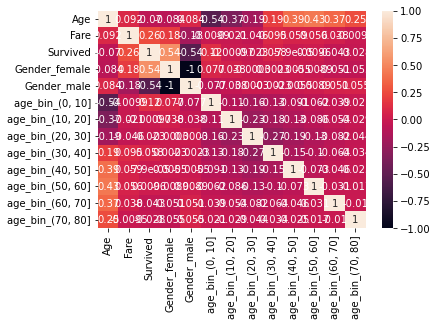

In [62]:
sns.heatmap(cor,annot=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

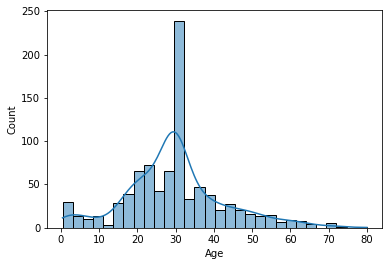

In [63]:
sns.histplot(new_df22['Age'],kde =True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

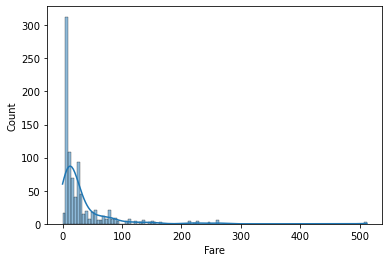

In [64]:
sns.histplot(new_df22['Fare'],kde =True)

In [65]:
#new_df22['Fare'] = np.log(df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

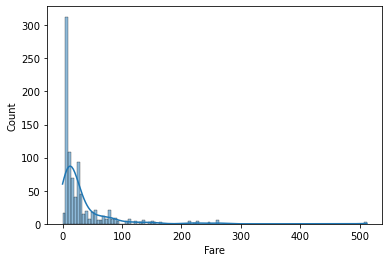

In [66]:
sns.histplot(new_df22['Fare'], kde =True)

In [67]:
new_df22=new_df22.replace(re,value='Lang')

NameError: name 're' is not defined

In [68]:
X = new_df22.drop(columns=["Survived"])
X
y=  new_df22["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [69]:
X.describe()

,Age,Fare,Gender_female,Gender_male,"age_bin_(0, 10]","age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 80]"
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.352413,0.647587,0.071829,0.129068,0.258137,0.173962,0.096521,0.047138,0.019080,0.005612
std,13.002015,49.693429,0.477990,0.477990,0.258350,0.335464,0.437855,0.379290,0.295470,0.212053,0.136882,0.074743
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)

GaussianNB()

In [72]:
prediction = GNBclf.predict(X_test)

In [73]:
prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [74]:
y_test

768    0
785    0
702    0
741    0
564    0
      ..
460    1
523    1
159    0
104    0
20     0
Name: Survived, Length: 223, dtype: int64

In [75]:
accuracy_score(y_test, prediction)

0.7802690582959642

In [76]:
prediction_prob = GNBclf.predict_proba(X_test)

In [77]:
prediction_prob[:10]

array([[9.73410344e-01, 2.65896560e-02],
       [9.73771316e-01, 2.62286843e-02],
       [2.62178111e-02, 9.73782189e-01],
       [8.50067817e-01, 1.49932183e-01],
       [4.54997024e-02, 9.54500298e-01],
       [1.01460035e-10, 1.00000000e+00],
       [2.86081179e-05, 9.99971392e-01],
       [9.46048320e-01, 5.39516800e-02],
       [8.95434921e-02, 9.10456508e-01],
       [9.74194194e-01, 2.58058057e-02]])

In [78]:
new_df22['new_Fare'] = pd.cut(new_df22['Fare'],bins = 3)
new_df22 = pd.get_dummies(new_df22,columns=["new_Fare"])

In [79]:
X= new_df22.drop(columns=["Fare","Age"])
X
y=  new_df22["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
X

,Survived,Gender_female,Gender_male,"age_bin_(0, 10]","age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 80]","new_Fare_(-0.512, 170.776]","new_Fare_(170.776, 341.553]","new_Fare_(341.553, 512.329]"
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,0,0,0,0,0,1,0,0
887,1,1,0,0,1,0,0,0,0,0,0,1,0,0
888,0,1,0,0,0,0,0,0,0,0,0,1,0,0
889,1,0,1,0,0,1,0,0,0,0,0,1,0,0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20)

In [86]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
GNBclf = CategoricalNB()
GNBclf.fit(X_train, y_train)

CategoricalNB()

In [87]:
prediction = GNBclf.predict(X_test)

In [89]:
accuracy_score( prediction,y_test)

1.0